In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = '/content/drive/MyDrive/soil'
image="/content/drive/MyDrive/soil/coal_soil"

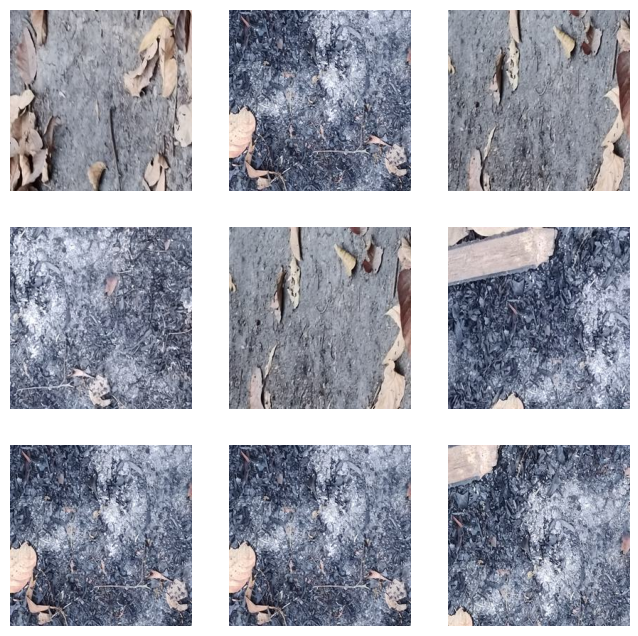

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive


# Step 2: Set the dataset folder path
dataset_path = "/content/drive/MyDrive/soil"  # Change this to your dataset location

# Function to display images from the folder
def display_images_from_drive(directory, num_images=9):
    image_files = []

    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_files.append(os.path.join(root, file))

    if len(image_files) == 0:
        print("No images found in the dataset folder.")
        return

    plt.figure(figsize=(8, 8))
    for i in range(min(num_images, len(image_files))):
        img = cv2.imread(image_files[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for Matplotlib
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.axis("off")

    plt.show()

# Step 3: Call function to display images
display_images_from_drive(dataset_path)

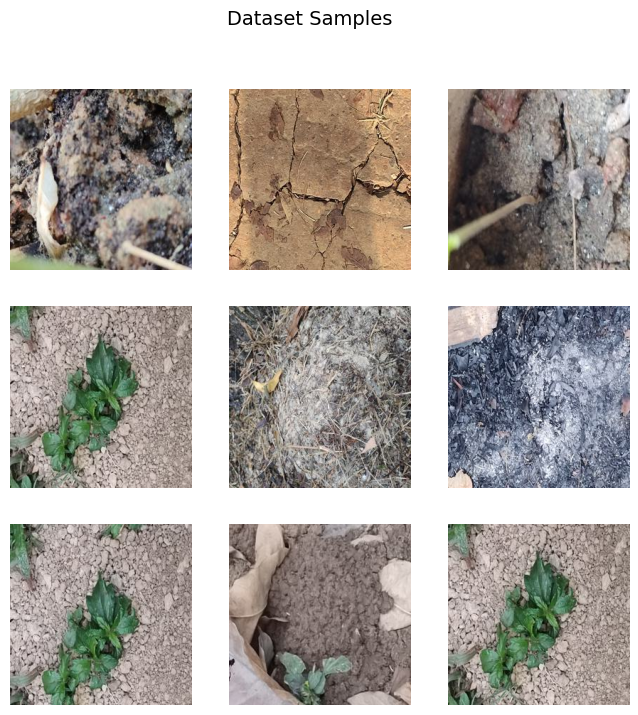

In [ ]:

# Set the dataset folder path (Update this to your actual path)
dataset_path = "/content/drive/MyDrive/soil"

# Function to display sample images from a folder
def display_images_from_drive(directory, num_images=9, title="Dataset Samples"):
    image_files = []

    # Get all image file paths
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_files.append(os.path.join(root, file))

    if len(image_files) == 0:
        print(f"No images found in {title} folder.")
        return

    # Randomly select images
    selected_images = np.random.choice(image_files, min(num_images, len(image_files)), replace=False)

    plt.figure(figsize=(8, 8))
    for i, img_path in enumerate(selected_images):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.axis("off")

    plt.suptitle(title, fontsize=14)
    plt.show()

# Display sample images from the dataset
display_images_from_drive(dataset_path, num_images=9, title="Dataset Samples")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_cnn_model(input_shape=(64, 64, 3), num_classes=10):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_cnn_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,143,242 (4.36 MB)

 Trainable params: 1,143,242 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

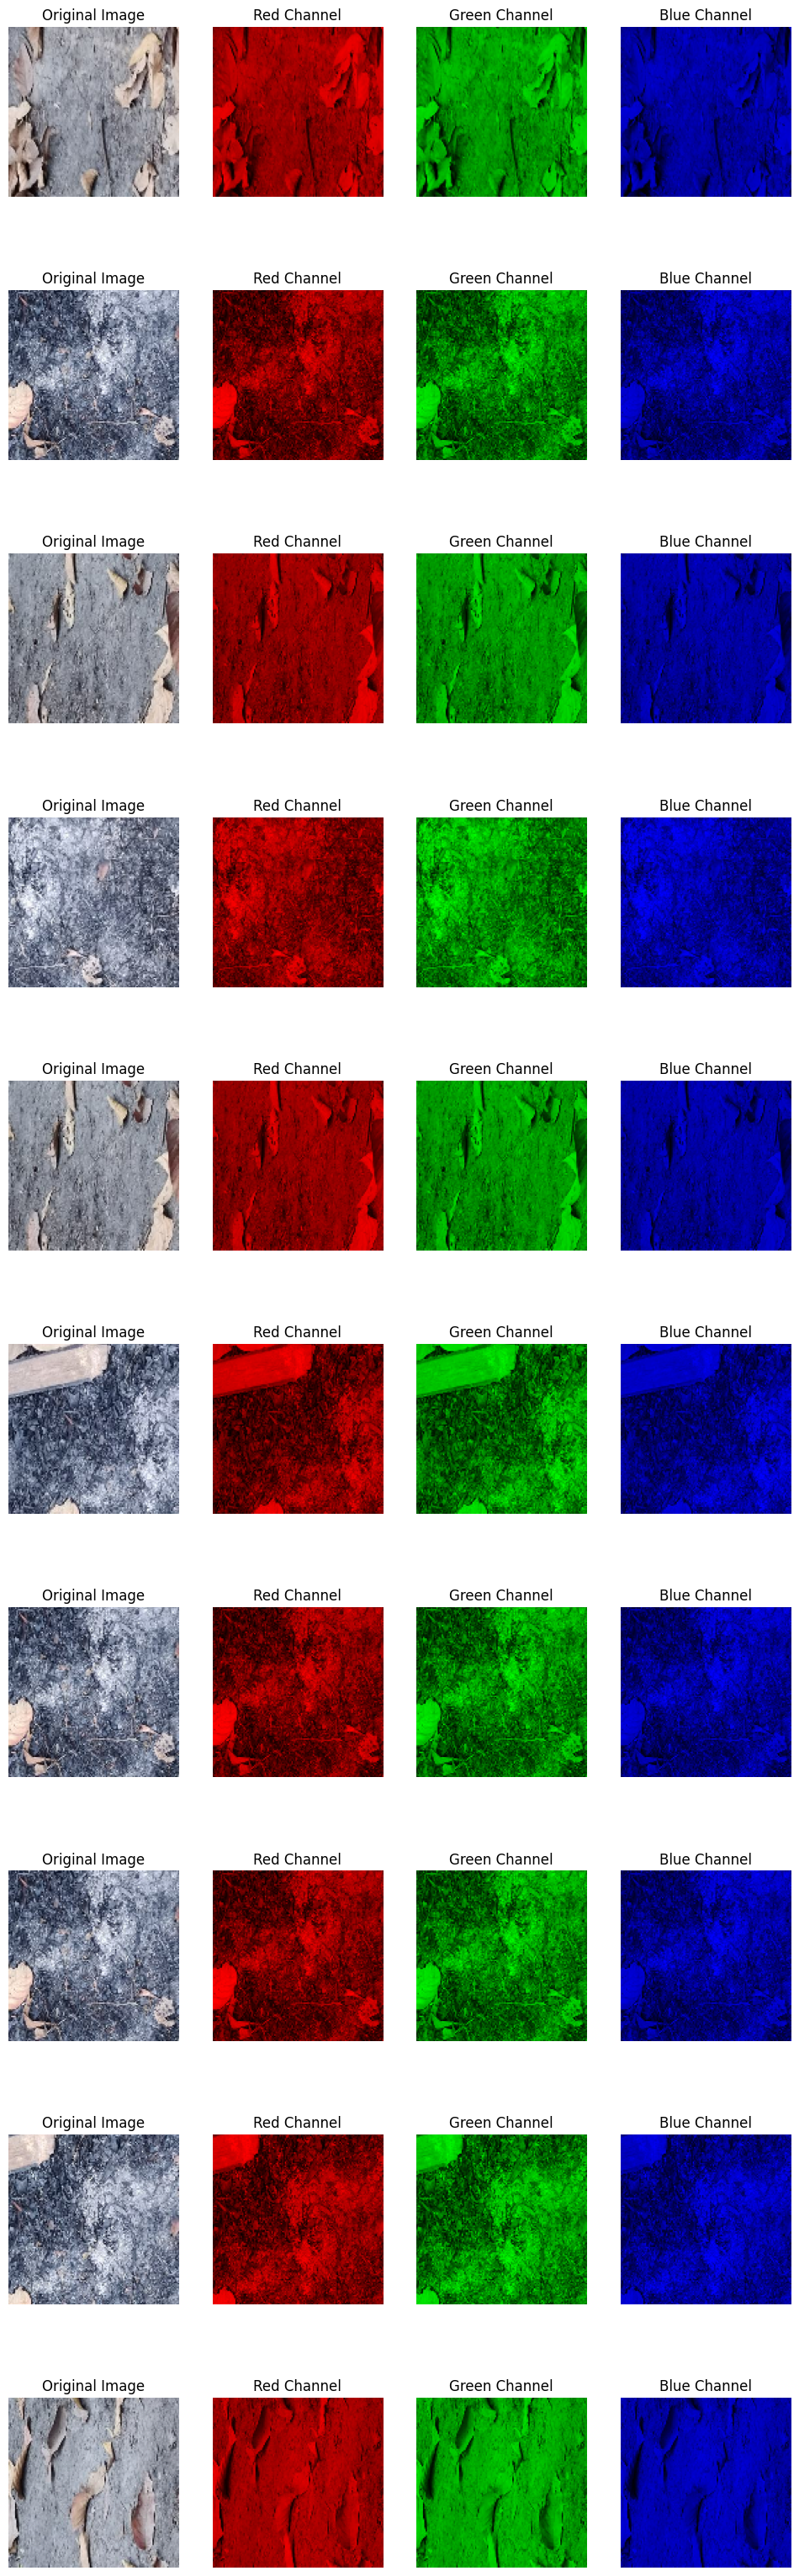

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array


# Function to display original and RGB channel images
def display_rgb_images(directory, num_images=5):
    image_files = []

    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_files.append(os.path.join(root, file))

    if len(image_files) == 0:
        print("No images found in the dataset folder.")
        return

    plt.figure(figsize=(12, num_images * 4))

    for i in range(min(num_images, len(image_files))):
        img_path = image_files[i]
        img = load_img(img_path, target_size=(128, 128))  # Load and resize image
        img_array = img_to_array(img) / 255.0  # Normalize to [0,1]

        # Extract RGB channels
        red_channel = img_array.copy()
        red_channel[:, :, 1:] = 0  # Remove Green & Blue

        green_channel = img_array.copy()
        green_channel[:, :, [0,2]] = 0  # Remove Red & Blue

        blue_channel = img_array.copy()
        blue_channel[:, :, :2] = 0  # Remove Red & Green

        # Display Original and RGB channels
        plt.subplot(num_images, 4, i * 4 + 1)
        plt.imshow(img)
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(num_images, 4, i * 4 + 2)
        plt.imshow(red_channel)
        plt.title("Red Channel")
        plt.axis("off")

        plt.subplot(num_images, 4, i * 4 + 3)
        plt.imshow(green_channel)
        plt.title("Green Channel")
        plt.axis("off")

        plt.subplot(num_images, 4, i * 4 + 4)
        plt.imshow(blue_channel)
        plt.title("Blue Channel")
        plt.axis("off")

    plt.show()

# Define dataset_path before calling the function
dataset_path = "/content/drive/MyDrive/soil"  # Or your actual path
display_rgb_images(dataset_path, num_images=10)

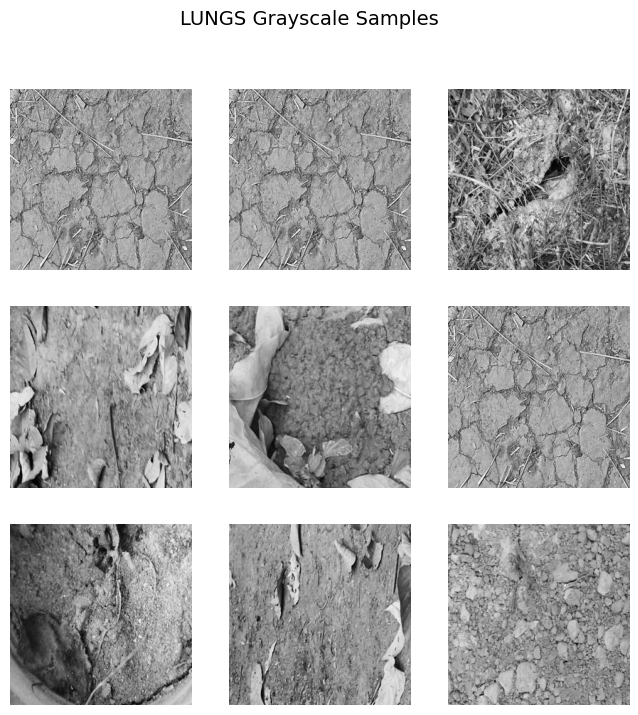

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Function to Display Grayscale Images
def display_grayscale_images(directory, num_images=9, title="Grayscale Dataset Samples"):
    image_files = []

    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_files.append(os.path.join(root, file))

    if len(image_files) == 0:
        print(f"No images found in {title} folder.")
        return

    selected_images = np.random.choice(image_files, min(num_images, len(image_files)), replace=False)

    plt.figure(figsize=(8, 8))
    for i, img_path in enumerate(selected_images):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to Grayscale
        plt.subplot(3, 3, i + 1)
        plt.imshow(img, cmap="gray")  # Display in grayscale
        plt.axis("off")

    plt.suptitle(title, fontsize=14)
    plt.show()

# 🔹 Define train_path before calling the function
train_path = "/content/drive/MyDrive/soil"  # Replace with the actual path to your training images

# 🔹 Display Grayscale Images
display_grayscale_images(train_path, num_images=9, title="LUNGS Grayscale Samples")

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.metrics import classification_report, confusion_matrix

dataset_path = "/content/drive/MyDrive/soil"  # Update path
img_size = (64, 64)
batch_size = 32

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2  # 80% train, 20% validation
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

# Get class labels
class_labels = list(train_generator.class_indices.keys())
num_classes = len(class_labels)

base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(64, 64, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Reduce overfitting
output = Dense(num_classes, activation='softmax')(x)  # Output layer


model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Predict class probabilities
y_pred_probs = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels
y_true = val_generator.classes

# Explicitly provide labels to classification_report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, labels=np.arange(num_classes), target_names=class_labels)) #labels argument added



Found 3618 images belonging to 5 classes.
Found 902 images belonging to 5 classes.


<ipython-input-10-03999309d810>:50: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(64, 64, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 915s 8s/step - accuracy: 0.3573 - loss: 1.7789 - val_accuracy: 0.4279 - val_loss: 1.7024
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 70s 616ms/step - accuracy: 0.7490 - loss: 0.6787 - val_accuracy: 0.5166 - val_loss: 1.5290
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 69s 606ms/step - accuracy: 0.8737 - loss: 0.3498 - val_accuracy: 0.5632 - val_loss: 1.4700
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 70s 611ms/step - accuracy: 0.9204 - loss: 0.2357 - val_accuracy: 0.7106 - val_loss: 0.9765
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 71s 619ms/step - accuracy: 0.9603 - loss: 0.1371 - val_accuracy: 0.7716 - val_loss: 0.8699
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 69s 608ms/step - accuracy: 0.9595 - loss: 0.1275 - val_accuracy: 0.8049 - val_loss: 0.7614
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 69s 607ms/step - accuracy: 0.9764 - loss: 0.0799 - val_accuracy: 0.8381 - val_loss: 0.5461
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 72s 636ms/step - accuracy: 0.9707 - loss: 0.0

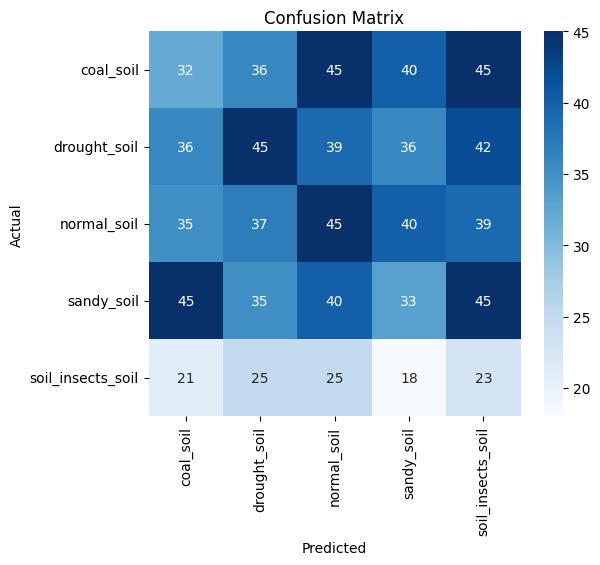

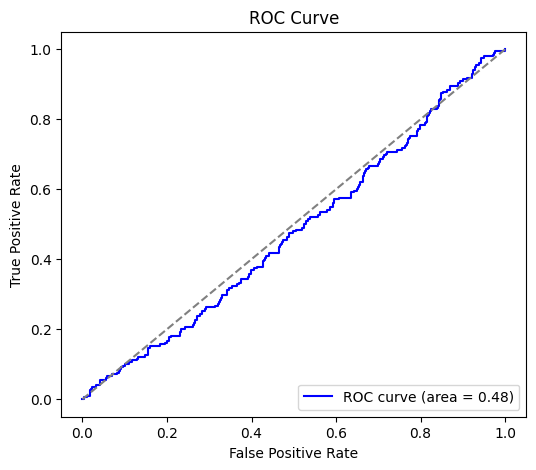

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# Get class labels
class_labels = list(val_generator.class_indices.keys())

# Simulate Predictions (if model is missing, replace with real model.predict)
y_true = val_generator.classes
y_pred_probs = np.random.rand(len(y_true), len(class_labels))  # Simulating probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert to class predictions

# Generate Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred_probs[:, 1], pos_label=1)  # Change index if more classes
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from scipy.stats import ttest_rel

# Simulated accuracies of two models on 10 test datasets
model_1_accuracies = np.random.rand(10)  # Replace with actual test accuracies
model_2_accuracies = np.random.rand(10)  # Replace with another model's accuracies

# Perform a paired T-test
t_stat, p_value = ttest_rel(model_1_accuracies, model_2_accuracies)

print(f"T-test Statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret results
if p_value < 0.05:
    print("Significant difference found between Model 1 and Model 2.")
else:
    print("No significant difference found between Model 1 and Model 2.")


T-test Statistic: -0.3774
P-value: 0.7146
No significant difference found between Model 1 and Model 2.


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Assume Model 1 and Model 2 had the following correct predictions
correct_model1 = 80  # Correct predictions by Model 1
total_model1 = 100  # Total samples for Model 1

correct_model2 = 75  # Correct predictions by Model 2
total_model2 = 100  # Total samples for Model 2

# Perform a Z-test
count = np.array([correct_model1, correct_model2])
nobs = np.array([total_model1, total_model2])
z_stat, p_value = proportions_ztest(count, nobs)

print(f"Z-test Statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Significant difference found in proportions of correct predictions.")
else:
    print("No significant difference found in proportions of correct predictions.")


Z-test Statistic: 0.8467
P-value: 0.3972
No significant difference found in proportions of correct predictions.
